*This notebook was run AFTER add_quality_data.py and create_database.py.*

Update database with new thresholds for numeric scores. For quantity scores, we used thresholds based on visual inspection of each quantitative score's distribution, by plotting the histograms. For the quality scores, we simply use min-max standardization.

Author: Daosheng Lin.

Editors: Ansel Lim.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create your connection.
cnx = sqlite3.connect('../data/database.db')

# read into df
df = pd.read_sql_query("SELECT * FROM properties", cnx)

In [4]:
# Looking at the general stats of the quantity and quality of the features
raw_cols = ['raw_num_carpark', 'raw_num_clinic', 'raw_num_community_center',
       'raw_num_eating_establishment', 'raw_num_gym', 'raw_num_hawker_center',
       'raw_num_mall', 'raw_num_mrt', 'raw_num_other_public_sports_facility',
       'raw_num_park', 'raw_num_primary_school', 'raw_num_secondary_school',
       'raw_num_supermarket', 'raw_num_taxi_stand', 'raw_num_bus_stop', 'raw_quality_clinic',
       'raw_quality_community_center', 'raw_quality_gym',
       'raw_quality_hawker_center', 'raw_quality_mall',
       'raw_quality_other_public_sports_facility', 'raw_quality_park',
       'raw_quality_primary_school', 'raw_quality_secondary_school',
       'raw_quality_supermarket']

df[raw_cols].describe()

,raw_num_carpark,raw_num_clinic,raw_num_community_center,raw_num_eating_establishment,raw_num_gym,raw_num_hawker_center,raw_num_mall,raw_num_mrt,raw_num_other_public_sports_facility,raw_num_park,...,raw_quality_clinic,raw_quality_community_center,raw_quality_gym,raw_quality_hawker_center,raw_quality_mall,raw_quality_other_public_sports_facility,raw_quality_park,raw_quality_primary_school,raw_quality_secondary_school,raw_quality_supermarket
count,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,...,10551.000000,9696.000000,5601.000000,7444.000000,8659.000000,4338.000000,8151.000000,10099.000000,9345.000000,10558.000000
mean,6.908329,17.117675,1.678915,317.072263,1.258715,1.458263,2.153100,2.182589,0.476917,2.245336,...,3.473423,4.124959,3.677275,4.079105,4.072930,4.195497,4.052209,4.262911,4.021736,3.982869
std,9.461392,7.701366,0.975133,201.731695,2.551598,1.578709,2.481558,2.118156,0.622594,2.293320,...,0.004964,0.019980,0.159506,0.052692,0.026761,0.059611,0.038638,0.001194,0.121196,0.004558
min,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.420867,4.081129,3.569691,4.032642,4.044327,4.131635,4.037289,4.257803,3.502190,3.969592
25%,0.000000,12.000000,1.000000,205.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,3.471398,4.113366,3.585705,4.055236,4.060082,4.165735,4.037970,4.262276,3.960730,3.979835
50%,3.000000,16.000000,2.000000,282.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,...,3.473966,4.119073,3.605940,4.068802,4.064405,4.175513,4.038389,4.262965,4.012442,3.981430
75%,9.000000,22.000000,2.000000,365.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,...,3.475982,4.135077,3.684211,4.086574,4.071416,4.189771,4.043993,4.263691,4.082784,3.984680
max,46.000000,48.000000,5.000000,2000.000000,31.000000,9.000000,21.000000,11.000000,3.000000,15.000000,...,3.500766,4.248290,4.200000,4.345622,4.500000,4.400000,4.700000,4.266271,4.539615,4.031090


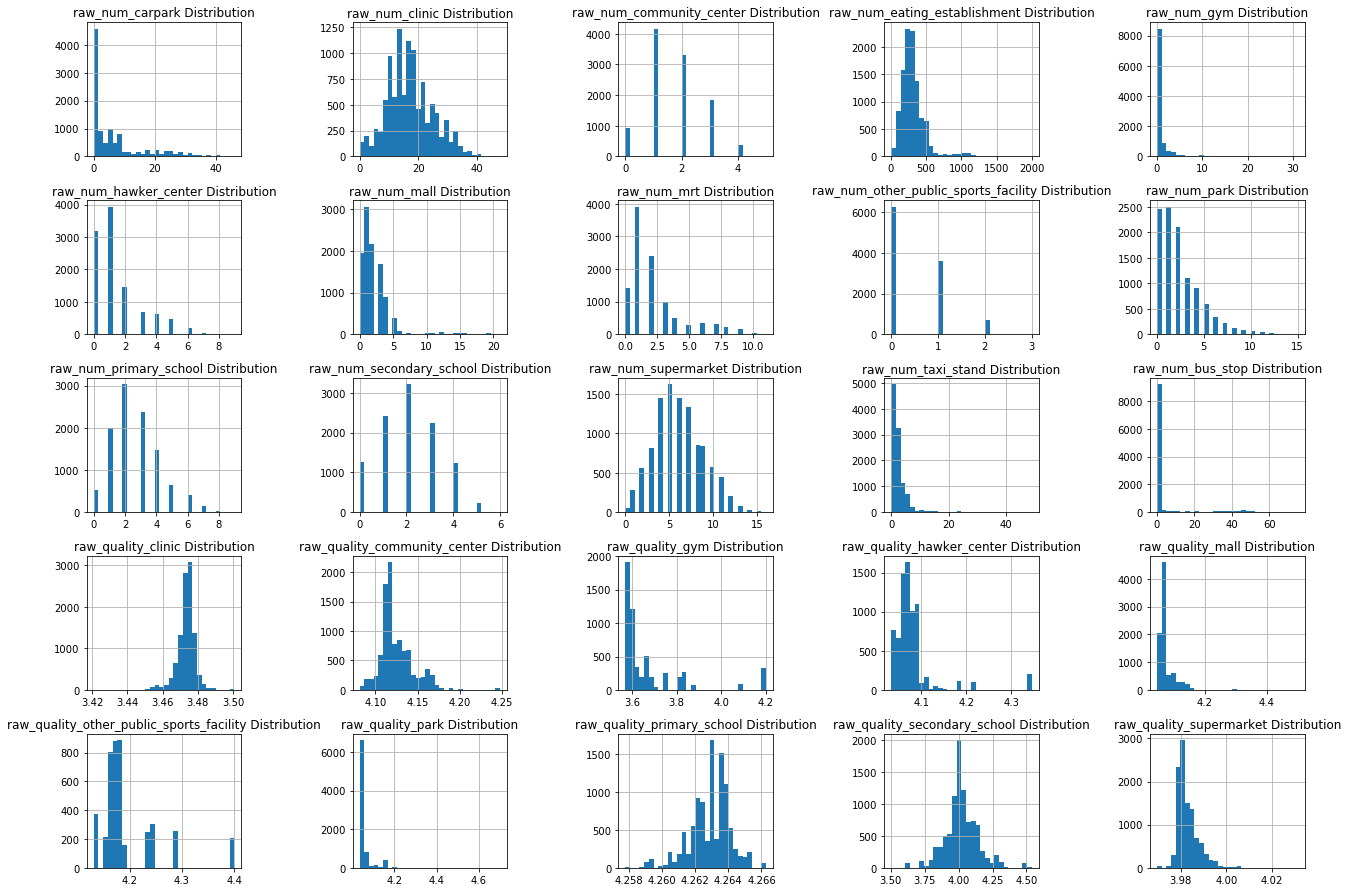

In [5]:
# Plot histograms to look at the distribution
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    fig.set_size_inches(18.5, 12.5)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=30,ax=ax)
        ax.set_title(var_name+" Distribution")
    
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(df[raw_cols], df[raw_cols].columns, 5, 5)

In [6]:
###### FEATURE-SPECIFIC THRESHOLDING #######
# Looking at each feature individually, we decided to use non-uniform widths to bin the various features.
# The original quartile thresholds were returning similar scores for a large number of residential projects, as the values tend to be skewed towards the median.

# Clinic: 0,1-10,11-20,>=21
bins = [0, 1, 11, 21, 99]
labels = [0, 0.333, 0.667, 1]
df['num_clinic'] = pd.cut(df['raw_num_clinic'], right=False, bins=bins, labels=labels)

# Community center: 0,1,2,>=3
bins = [0, 1, 2, 3, 99]
labels = [0, 0.333, 0.667, 1]
df['num_community_center'] = pd.cut(df['raw_num_community_center'], right=False, bins=bins, labels=labels)

# Gyms: 0,1-2,3-5,>=6
bins = [0, 1, 3, 6, 99]
labels = [0, 0.333, 0.667, 1]
df['num_gym'] = pd.cut(df['raw_num_gym'], right=False, bins=bins, labels=labels)

# Hawker centers: 0,1-2,3-4,>=5
bins = [0, 1, 3, 5, 99]
labels = [0, 0.333, 0.667, 1]
df['num_hawker_center'] = pd.cut(df['raw_num_hawker_center'], right=False, bins=bins, labels=labels)

# Malls: 0,1-2,3-4,>=5
bins = [0, 1, 3, 5, 99]
labels = [0, 0.333, 0.667, 1]
df['num_mall'] = pd.cut(df['raw_num_mall'], right=False, bins=bins, labels=labels)

# Other_public_sports_facility:	0,1,>=2
bins = [0, 1, 2, 99]
labels = [0, 0.5, 1]
df['num_other_public_sports_facility'] = pd.cut(df['raw_num_other_public_sports_facility'], right=False, bins=bins, labels=labels)

# Parks: 1,2,3,>=4
# Primary schools: 1,2,3,>=4
# Secondary schools: 1,2,3,>=4
bins = [0, 1, 2, 3, 4, 99]
labels = [0, 0.25, 0.5, 0.75, 1]
df['num_park'] = pd.cut(df['raw_num_park'], right=False, bins=bins, labels=labels)
df['num_primary_school'] = pd.cut(df['raw_num_primary_school'], right=False, bins=bins, labels=labels)
df['num_secondary_school'] = pd.cut(df['raw_num_secondary_school'], right=False, bins=bins, labels=labels)

# Supermarket: 1-3,4-5,6-7,>=8
bins = [0, 1, 4, 6, 8, 99]
labels = [0, 0.25, 0.5, 0.75, 1]
df['num_supermarket'] = pd.cut(df['raw_num_supermarket'], right=False, bins=bins, labels=labels)

# Carpark: 0,1,2,3-9,>=10
bins = [0, 1, 2, 3, 10, 99]
labels = [0, 0.25, 0.5, 0.75, 1]
df['num_carpark'] = pd.cut(df['raw_num_carpark'], right=False, bins=bins, labels=labels)

# MRT: 0,1,2,3,4,>= 5
# Taxi: 0,1,2,3,4,>= 5
bins = [0, 1, 2, 3, 4, 5, 99]
labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
df['num_mrt'] = pd.cut(df['raw_num_mrt'], right=False, bins=bins, labels=labels)
df['num_taxi_stand'] = pd.cut(df['raw_num_taxi_stand'], right=False, bins=bins, labels=labels)

# Eating establishment: 0, 1 - 125, 126 - 250, 251 - 375, 376 - 500, Above 500
bins = [0, 1, 125, 250, 375, 500, 9999]
labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
df['num_eating_establishment'] = pd.cut(df['raw_num_eating_establishment'], right=False, bins=bins, labels=labels)

# Bus stops: 0,1-14,15-39,>=40
bins = [0, 1, 15, 40, 100]
labels = [0, 0.33, 0.66, 1.00]
df['num_bus_stop'] = pd.cut(df['raw_num_bus_stop'], right=False, bins=bins, labels=labels)

cols = ['raw_num_carpark', 'num_carpark', 'raw_num_clinic', 'num_clinic', 'raw_num_community_center', 'num_community_center',
       'raw_num_eating_establishment', 'num_eating_establishment', 'raw_num_gym', 'num_gym', 'raw_num_hawker_center', 'num_hawker_center',
       'raw_num_mall', 'num_mall', 'raw_num_mrt', 'num_mrt', 'raw_num_other_public_sports_facility', 'num_other_public_sports_facility',
       'raw_num_park', 'num_park', 'raw_num_primary_school', 'num_primary_school', 'raw_num_secondary_school', 'num_secondary_school',
       'raw_num_supermarket', 'num_supermarket', 'raw_num_taxi_stand', 'num_taxi_stand', 'raw_num_bus_stop', 'num_bus_stop']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [7]:
# Similarly, the quality scores were not performing well with the quartile thresholds. 
# Instead we decided to use min-max standardization of the review ratings.

# Update scores for quality features.  Use min-max standardization
# i.e. z = (x - min(x)) / ((max(x) - min(x)))

quality_cols = ['quality_clinic','quality_community_center','quality_gym','quality_hawker_center','quality_mall','quality_other_public_sports_facility','quality_park','quality_primary_school','quality_secondary_school','quality_supermarket']
raw_quality_cols = ['raw_quality_clinic','raw_quality_community_center','raw_quality_gym','raw_quality_hawker_center','raw_quality_mall','raw_quality_other_public_sports_facility','raw_quality_park','raw_quality_primary_school','raw_quality_secondary_school','raw_quality_supermarket']
all_quality_cols = ['quality_clinic','quality_community_center','quality_gym','quality_hawker_center','quality_mall','quality_other_public_sports_facility','quality_park','quality_primary_school','quality_secondary_school','quality_supermarket'
            ,'raw_quality_clinic','raw_quality_community_center','raw_quality_gym','raw_quality_hawker_center','raw_quality_mall','raw_quality_other_public_sports_facility','raw_quality_park','raw_quality_primary_school','raw_quality_secondary_school','raw_quality_supermarket']

df[quality_cols] = (df[raw_quality_cols]-df[raw_quality_cols].min())/(df[raw_quality_cols].max()-df[raw_quality_cols].min())
df[quality_cols] = df[quality_cols].fillna(0)

df[all_quality_cols].head()

,quality_clinic,quality_community_center,quality_gym,quality_hawker_center,quality_mall,quality_other_public_sports_facility,quality_park,quality_primary_school,quality_secondary_school,quality_supermarket,raw_quality_clinic,raw_quality_community_center,raw_quality_gym,raw_quality_hawker_center,raw_quality_mall,raw_quality_other_public_sports_facility,raw_quality_park,raw_quality_primary_school,raw_quality_secondary_school,raw_quality_supermarket
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.981268
1,0.705887,0.214119,0.046752,0.134607,0.000000,0.182811,0.010841,0.681898,0.484294,0.221648,3.477267,4.116921,3.599159,4.074771,NaN,4.180695,4.044473,4.263577,4.004608,3.983223
2,0.706821,0.215929,0.022794,0.092414,0.057543,0.000000,0.002240,0.648458,0.362262,0.171303,3.477341,4.117224,3.584058,4.061565,4.070548,NaN,4.038773,4.263294,3.878009,3.980127
3,0.646806,0.354509,0.023532,0.140216,0.048031,0.194996,0.001136,0.607862,0.000000,0.279672,3.472546,4.140389,3.584523,4.076526,4.066214,4.183965,4.038042,4.262950,NaN,3.986791
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.189868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.981268


In [11]:
df.head()

,index,project_id,condo_street,project,condo_market_segment,lat,long,price_per_sqm,district,condo_commonest_tenure,...,raw_quality_clinic,raw_quality_community_center,raw_quality_gym,raw_quality_hawker_center,raw_quality_mall,raw_quality_other_public_sports_facility,raw_quality_park,raw_quality_primary_school,raw_quality_secondary_school,raw_quality_supermarket
0,0,0,COVE DRIVE,TURQUOISE,CCR,1.242441,103.836755,15570.333697,4,99 yrs lease commencing from 2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.981268
1,1,1,ALEXANDRA VIEW,ARTRA,RCR,1.290031,103.817185,19221.824435,3,99 yrs lease commencing from 2016,...,3.477267,4.116921,3.599159,4.074771,NaN,4.180695,4.044473,4.263577,4.004608,3.983223
2,2,2,YONG SIAK STREET,RESIDENTIAL APARTMENTS,RCR,1.282506,103.830272,16778.801843,3,9999 yrs lease commencing from 1963,...,3.477341,4.117224,3.584058,4.061565,4.070548,NaN,4.038773,4.263294,3.878009,3.980127
3,3,3,BEACH ROAD,CITY GATE,RCR,1.302348,103.862260,20725.023997,7,99 yrs lease commencing from 2014,...,3.472546,4.140389,3.584523,4.076526,4.066214,4.183965,4.038042,4.262950,NaN,3.986791
4,4,4,OCEAN DRIVE,THE COAST AT SENTOSA COVE,CCR,1.245289,103.843546,16626.204339,4,99 yrs lease commencing from 2006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.981268


In [9]:
# Update to db. Overwrite existing properties table
df.to_sql(name='properties', index=False, if_exists='replace', con=cnx)
cnx.close()